In [1]:
import numpy as np
import pandas as pd
import os

In [24]:
from matplotlib import pyplot as plt

In [48]:
import seaborn as sns

In [5]:
# setting
pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_tab', -1)

## 概览

In [4]:
print('\n'. join(os.listdir('../rawdata')))

application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
HomeCredit_columns_description.csv
installments_payments.csv
POS_CASH_balance.csv
previous_application.csv
sample_submission.csv


+ application_test.csv   每笔贷款申请时的数据，为测试集
+ application_train.csv   同上，为训练集
+ bureau.csv   从信贷局中返回HomeCredit用户在其他贷款平台上的信用审核情况
+ bureau_balance.csv   信贷局上用户的月度余额信息
+ credit_card_balance.csv  HomeCredit用户申请时使用的信用卡月度余额
+ HomeCredit_columns_description.csv    文件每列说明
+ installments_payments.csv    HomeCredit上已有信用支付的偿还历史记录
+ POS_CASH_balance.csv    HomeCredit用户现金贷月度余额
+ previous_application.csv    HomeCredit贷款用户之前的申请记录
+ sample_submission.csv    模型结果提交示例


### application_test

In [6]:
application_train = pd.read_csv('../rawdata/application_train.csv')

In [3]:
application_train.shape

(307511, 122)

In [7]:
application_test = pd.read_csv('../rawdata/application_test.csv')

In [8]:
application_test.shape

(48744, 121)

In [11]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [12]:
from rosaceae.utils import summary 

In [14]:
application_summary = summary(application_train.drop(labels=['SK_ID_CURR', 'TARGET'], axis=1))

In [15]:
application_summary.head()

,Field,Type,Recs,Miss,Min,Q25,Q50,Avg,Q75,Max,StDv,Uniq,OutLo,OutHi
0,NAME_CONTRACT_TYPE,object,307511,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1,CODE_GENDER,object,307511,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
2,FLAG_OWN_CAR,object,307511,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
3,FLAG_OWN_REALTY,object,307511,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
4,CNT_CHILDREN,int64,307511,0,0.0,0.0,0.0,0.4171,1.0,19.0,0.7221,15,0,4272


In [16]:
application_summary.to_csv('application_summary.csv', index=False)

In [4]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 指标分布情况

In [116]:
def barplot(variable):  
    grouped = application_train[['TARGET', variable, 'SK_ID_CURR']].groupby(by=[variable, 'TARGET'])
    value_counts =  grouped['SK_ID_CURR'].agg('count')
    y1, y2 = [[value_counts[i].get(j, 0) for i in sorted(set(value_counts.index.get_level_values(0)))] 
              for j in sorted(set(value_counts.index.get_level_values(1)))]
    labels = sorted(set(value_counts.index.get_level_values(0)))
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, y1, width, label='0')
    rects2 = ax.bar(x + width/2, y2, width, label='1')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Counts')
    ax.set_title(variable)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    totals = [y1[_i] + y2[_i] for _i in range(len(y1))]
    totals_rate = ['%s: %.2f%%' % (labels[i], j / sum(totals) * 100) for i, j in enumerate(totals)]
    
    def autolabel(rects, totals):
        for _i, rect in enumerate(rects):
            height = rect.get_height()
            #print(_i, height, totals)
            ax.annotate('{}, {:.2f}%'.format(height, height/totals[_i]*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    autolabel(rects1, totals)
    autolabel(rects2, totals)
    fig.tight_layout()
    print('\t'.join(totals_rate))
    plt.show()        

In [133]:
def densityplot(variable):
    plt.figure(figsize=(9,6))
    sns.distplot(application_train[variable][application_train['TARGET']==1], label='1', hist=False)
    sns.distplot(application_train[variable][application_train['TARGET']==0], label='0', hist=False)
    plt.legend()
    plt.show()

In [55]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

### NAME_CONTRACT_TYPE 合约类型

Cash loans: 90.48%	Revolving loans: 9.52%


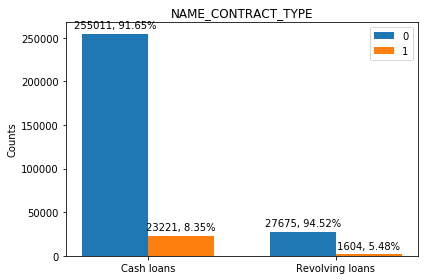

In [117]:
barplot('NAME_CONTRACT_TYPE')

大部分是现金贷类型，循环贷比较少。现金贷中逾期行占比稍高一些

### CODE_GENDER 性别

F: 65.83%	M: 34.16%	XNA: 0.00%


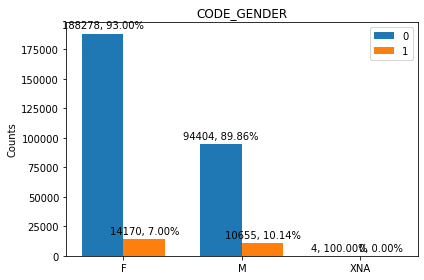

In [118]:
barplot('CODE_GENDER')

性别数据存在少量的缺失（一共缺失样本4个），男性客户逾期占比大于女性客户。客户性别女性占多数

### FLAG_OWN_CAR 是否有车

N: 65.99%	Y: 34.01%


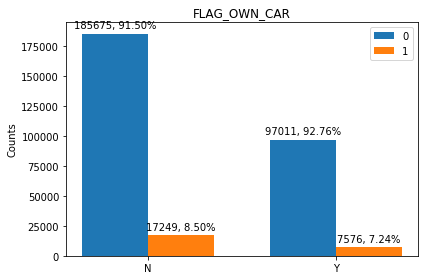

In [119]:
barplot('FLAG_OWN_CAR')

客户群体有车占少数，同时有车用户的逾期占比稍低一些。可能有车客户经济情况好一些。

### FLAG_OWN_REALTY 是否有不动产

N: 30.63%	Y: 69.37%


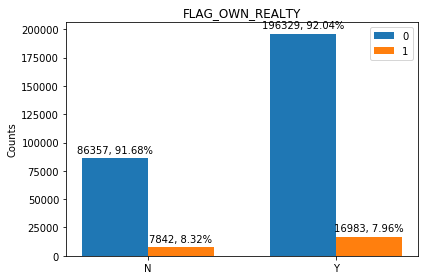

In [120]:
barplot('FLAG_OWN_REALTY')

客户群体中有不动产的比例比较高，而且该部分客户的逾期占比稍低于未拥有不动产的客户

### CNT_CHILDREN 家庭有几个小朋友

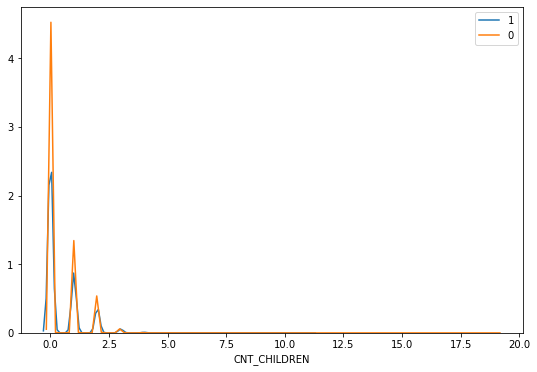

In [134]:
densityplot('CNT_CHILDREN')

可以看到，可能会有一些比较异常的极端值出现。

### AMT_INCOME_TOTAL 总收入

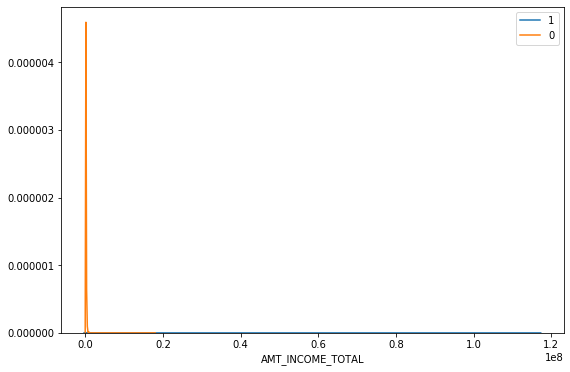

In [135]:
densityplot('AMT_INCOME_TOTAL')

逾期用户中，出现了一些异常值

### AMT_CREDIT 信用额度

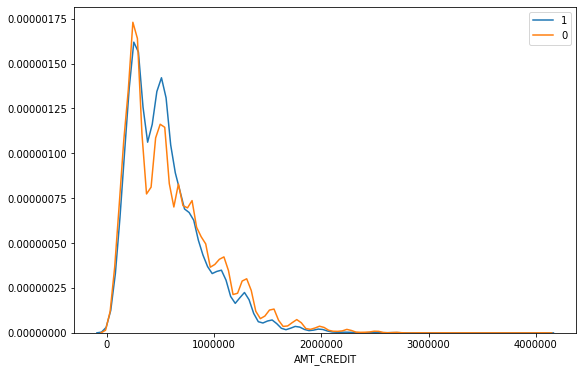

In [136]:
densityplot('AMT_CREDIT')